In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')

In [24]:
train_path=r"D:\celluo\task 1\Teeth_Dataset\Training"
Validation_path=r"D:\celluo\task 1\Teeth_Dataset\Validation"
test_path=r"D:\celluo\task 1\Teeth_Dataset\Testing"

In [25]:
teeth_classes=os.listdir(train_path)
print(teeth_classes)

['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [26]:
teeth_classes=os.listdir(test_path)
print(teeth_classes)

['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


# visualization

In [27]:
list(teeth_classes)

['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

In [28]:
def plot_image(teeth_classes):
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(teeth_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(4, 4, i + 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

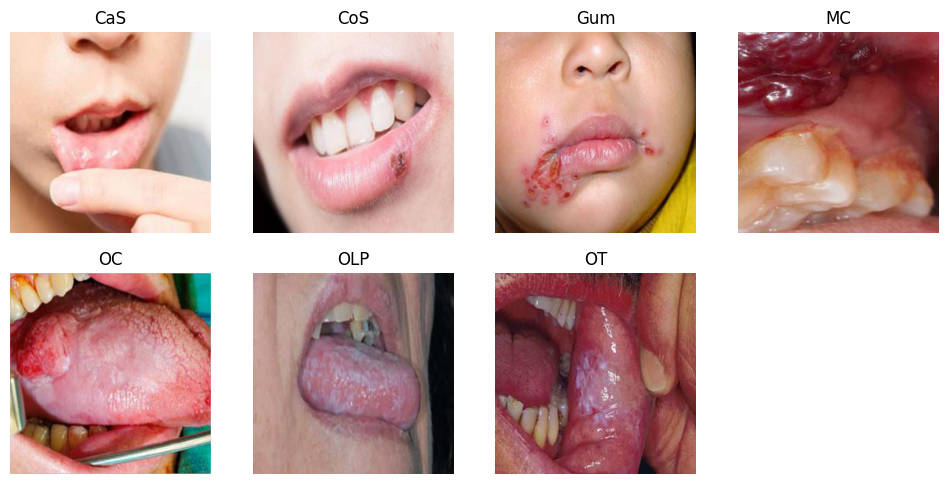

In [29]:
plot_image(teeth_classes)

# preprocessing

In [30]:
data_generator=ImageDataGenerator(rescale=1/255)

In [31]:
train_data=data_generator.flow_from_directory(train_path,
                                              target_size=(128,128),
                                              batch_size=16,class_mode='categorical'

                                             )

Found 3087 images belonging to 7 classes.


In [32]:
Validation_data=data_generator.flow_from_directory(Validation_path,
                                              target_size=(128,128),
                                              batch_size=16,
                                              class_mode='categorical'
                                             )

Found 1028 images belonging to 7 classes.


In [33]:
test_data=data_generator.flow_from_directory(test_path,target_size=(128,128), batch_size=1, class_mode='categorical')

Found 1028 images belonging to 7 classes.


In [34]:
def plot_image(teeth_classes):
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(teeth_classes):
        image_path = train_data + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(4, 4, i + 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

In [35]:
plot_image(teeth_classes)

TypeError: unsupported operand type(s) for +: 'DirectoryIterator' and 'str'

<Figure size 1200x1200 with 0 Axes>

# build_model

In [38]:
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(7,activation='softmax'))

In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 64)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,220,903 (16.10 MB)

 Trainable params: 4,220,903 (16.10 MB)

 Non-trainable params: 0 (0.00 B)

# compile

In [40]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


# fit model

In [41]:
model_history =model.fit(train_data,
                        epochs=6,
                        validation_data=Validation_data)

Epoch 1/6
193/193 ━━━━━━━━━━━━━━━━━━━━ 38s 169ms/step - accuracy: 0.2116 - loss: 1.9307 - val_accuracy: 0.4076 - val_loss: 1.6282
Epoch 2/6
193/193 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - accuracy: 0.4186 - loss: 1.5298 - val_accuracy: 0.4086 - val_loss: 1.5344
Epoch 3/6
193/193 ━━━━━━━━━━━━━━━━━━━━ 31s 158ms/step - accuracy: 0.5780 - loss: 1.1689 - val_accuracy: 0.5554 - val_loss: 1.2185
Epoch 4/6
193/193 ━━━━━━━━━━━━━━━━━━━━ 43s 218ms/step - accuracy: 0.7344 - loss: 0.7380 - val_accuracy: 0.6002 - val_loss: 1.1565
Epoch 5/6
193/193 ━━━━━━━━━━━━━━━━━━━━ 35s 180ms/step - accuracy: 0.8804 - loss: 0.3859 - val_accuracy: 0.5652 - val_loss: 1.3236
Epoch 6/6
193/193 ━━━━━━━━━━━━━━━━━━━━ 32s 164ms/step - accuracy: 0.9322 - loss: 0.2278 - val_accuracy: 0.6187 - val_loss: 1.4502


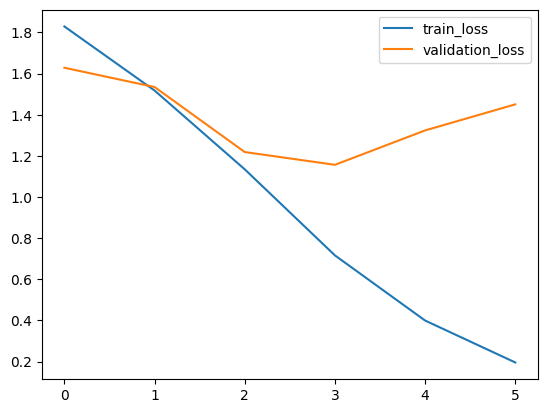

In [42]:
plt.plot(model_history.history['loss'],label='train_loss')
plt.plot(model_history.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

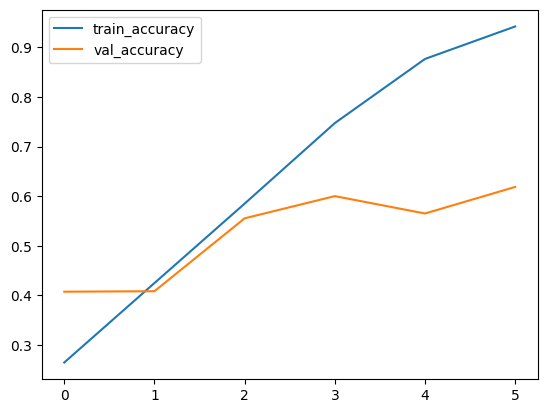

In [43]:
plt.plot(model_history.history['accuracy'],label='train_accuracy')
plt.plot(model_history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [44]:

from tensorflow.keras.regularizers import l1, l2
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=[128,128,3],kernel_regularizer = l2(0.2)))
BatchNormalization()
model.add(MaxPooling2D())
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.2) #prevent overfitting
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(7,activation='softmax'))


In [45]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [46]:
model_history =model.fit(train_data,
                        epochs=6,
                        validation_data=Validation_data)

Epoch 1/6
193/193 ━━━━━━━━━━━━━━━━━━━━ 29s 121ms/step - accuracy: 0.2099 - loss: 2.8835 - val_accuracy: 0.3239 - val_loss: 2.0241
Epoch 2/6
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 118ms/step - accuracy: 0.3830 - loss: 1.8772 - val_accuracy: 0.4562 - val_loss: 1.6309
Epoch 3/6
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.5321 - loss: 1.4530 - val_accuracy: 0.4883 - val_loss: 1.5821
Epoch 4/6
193/193 ━━━━━━━━━━━━━━━━━━━━ 30s 153ms/step - accuracy: 0.6427 - loss: 1.1748 - val_accuracy: 0.5253 - val_loss: 1.4069
Epoch 5/6
193/193 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 0.7684 - loss: 0.8270 - val_accuracy: 0.5710 - val_loss: 1.4055
Epoch 6/6
193/193 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 0.8744 - loss: 0.5554 - val_accuracy: 0.6119 - val_loss: 1.3249


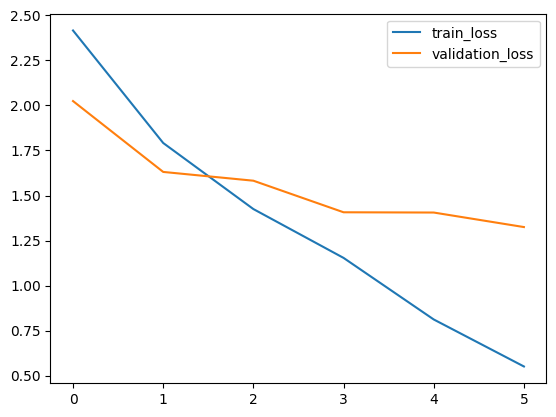

In [47]:
plt.plot(model_history.history['loss'],label='train_loss')
plt.plot(model_history.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

In [48]:
model.evaluate(test_data)

1028/1028 ━━━━━━━━━━━━━━━━━━━━ 30s 29ms/step - accuracy: 0.6179 - loss: 1.2618


[1.3665807247161865, 0.6011673212051392]

In [49]:
model.save('teeth.h5')